
## 인공신경망 활용
-----
- pytorch를 사용하여 기본적인 인공신경망을 생성하여 이미지 분류기를 생성합니다.
- 데이터셋: [Fashion MNIST](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)

- **reference**
    - https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
    - https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

## Fashion MNIST Classifier
----
Fashion MNIST 데이터셋을 사용하여 옷의 품목을 구분하는 분류기를 신경망을 사용하여 구현해봅니다.

In [2]:
# 1번
# 필요한 모듈을 모두 이곳에 나열하세요
# 2점
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
# 2번
# FashionMNIST 데이터(train, test)를 불러오세요
# 2점
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17684391.52it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 325963.86it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5526338.25it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 899903.18it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
# 3번
# train, test DataLoader를 만듭니다.
# 배치사이즈: 64
# 2점
dataloaders = {
    'train':DataLoader(
        training_data,
        batch_size=64,
        shuffle=True
    ),
    'test': DataLoader(
        test_data,
        batch_size=64,
        shuffle=False
    )
}

In [5]:
# 4번
# Device 설정은 GPU로 합니다
# 2점
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# GPU 다썼는데 QA하느라 cpu로 바뀌었어요...😭

cpu


In [6]:
# 5번
# train, test의 shape를 확인합니다.
# 2점
train_data_shape = next(iter(dataloaders['train']))[0].shape
test_data_shape = next(iter(dataloaders['test']))[0].shape

print(f"Train data shape: {train_data_shape}")
print(f"Test data shape: {test_data_shape}")

Train data shape: torch.Size([64, 1, 28, 28])
Test data shape: torch.Size([64, 1, 28, 28])


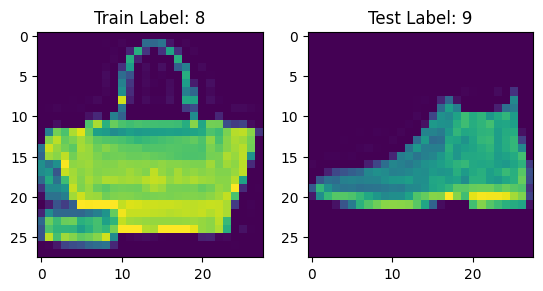

In [7]:
# 6번
# train, test의 첫번째 인덱스 데이터를 이미지로 확인합니다. (0번인덱스)
# 2점

plt.subplot(121)
train_imgs, train_labels = next(iter(dataloaders['train']))
img = train_imgs[0].squeeze()
label = train_labels[0]
plt.imshow(img)
plt.title(f'Train Label: {label}')


plt.subplot(122)
test_imgs, test_labels = next(iter(dataloaders['test']))
img = test_imgs[0].squeeze()
label = test_labels[0]
plt.imshow(img)
plt.title(f'Test Label: {label}')

plt.show()


In [8]:
# 7번
# 아래 코드를 실행해서 labels_map 객체를 딕셔너리로 생성합니다.
# 2점
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

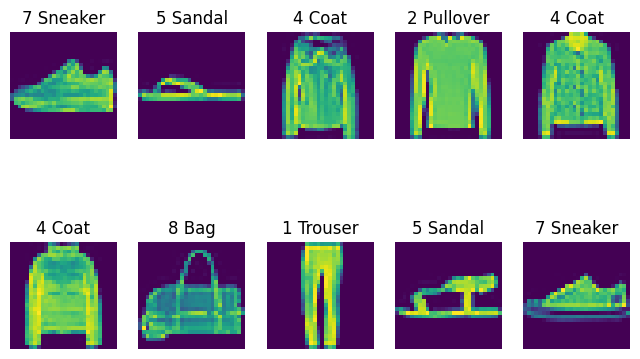

In [9]:
# 8번
# 2행 5열로 train 데이터를 이미지로 출력합니다.
# labels_map를 이용하여 이미지의 label도 함께 출력합니다.
# 2점
figure = plt.figure(figsize=(8, 5))
cols, rows = 5,2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(str(label) + ' '+ labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

In [ ]:
# 9번
# reference를 참고하여 인공신경망 클래스를 설계합니다.
# 2점
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()  # 일렬로 데이터(행렬) 펴줌
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10)  # 128 개를 받아서 10개로 출력
    )
  def forward(self, x):  #  NeuralNetwork를 실행되면 자동으로 실행되는 함수
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [ ]:
# 10번
# 인공신경망 객체를 GPU에 저장합니다. to(device)
# 2점
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# 11번
# 28*28 텐서를 GPU에 만들어 인공신경망에 input으로 넣어줍니다.
# 학습되지 않은 모델의 예측 결과를 출력합니다.  # 모델을 그냥 찍어봄 print(model)
# 3점
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print(logits)

tensor([[ 0.0721, -0.1615, -0.0149, -0.0979,  0.0567, -0.0157, -0.2213, -0.0390,
          0.1526,  0.1948]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
# 12번
# 예측값을 소프트맥스 함수를 넣고 가장 높은 확률의 값을 출력합니다. # 엉뚱한값이 나올것임!
# 3점
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)     # 가장 확률이 큰 인덱스값을 찾음
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9], device='cuda:0')


In [ ]:
# 13번
# Loss 함수를 정의합니다.  # CrossEntropyLoss
# 학습률을 0.001로 설정합니다.  # lr=0.001
# 옵티마이저는 Adam을 사용합니다.  # optim.Adam()
# 3점
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# 14번
# 학습 함수를 train_loop로 작성합니다.  # 학습시킬때 항상 이 함수를 사용하도록
# 매개변수(데이터로더, 모델, loss 함수, 옵티마이저)
# 데이터로더의 인덱스가 배치사이즈 마다loss를 출력합니다.
# 3점
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 64 == 0:
      loss, acc = loss.item(), batch* len(X)
      print(f'loss: {loss:>7} [{acc}/{size}]')

In [ ]:
# 15번
# 테스트 함수를 test_loop로 작성합니다.
# 매개변수(데이터로더, 모델, loss 함수)
# 데이터로더의 크기만큼 반복하며 loss를 출력하고 전체 accuracy와 평균 loss를 구합니다.
# 3점

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, current = 0, 0

  model.eval()

  with torch.no_grad():
    for X, y in dataloader:
      X,y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred,y).item()
      current += (pred.argmax(1)==y).type(torch.float).sum().item() # 확률이 가장 큰 값의 레이블과 실제 레이블이 같으면 True -> 1, 다르면 False -> 0

    test_loss /= num_batches
    current /= size
    print(f'Test Error: \n Accuracy:{(100*current):>0.1f}%, Avg loss: {test_loss:8f} \n')

In [ ]:
# 16번
# 100번의 epochs를 돌며 학습을 반복합니다.
# 3점
epochs = 100

for t in range(epochs):
    print(f'Epoch {t+1}\---------------------')
    train_loop(dataloaders['train'], model, loss_fn, optimizer)
    test_loop(dataloaders['test'], model, loss_fn)
print('끝!')

Epoch 1\---------------------
loss: 2.2967729568481445 [0/60000]
loss: 0.7235490679740906 [4096/60000]
loss: 0.8296357989311218 [8192/60000]
loss: 0.6119370460510254 [12288/60000]
loss: 0.4954594373703003 [16384/60000]
loss: 0.5678799152374268 [20480/60000]
loss: 0.6504456400871277 [24576/60000]
loss: 0.42854878306388855 [28672/60000]
loss: 0.6778626441955566 [32768/60000]
loss: 0.4634266495704651 [36864/60000]
loss: 0.6792503595352173 [40960/60000]
loss: 0.5700581669807434 [45056/60000]
loss: 0.3806096017360687 [49152/60000]
loss: 0.4171927571296692 [53248/60000]
loss: 0.46073928475379944 [57344/60000]
Test Error: 
 Accuracy:84.1%, Avg loss: 0.444048 

Epoch 2\---------------------
loss: 0.5716106295585632 [0/60000]
loss: 0.334086537361145 [4096/60000]
loss: 0.37426674365997314 [8192/60000]
loss: 0.36752739548683167 [12288/60000]
loss: 0.2846989035606384 [16384/60000]
loss: 0.32460546493530273 [20480/60000]
loss: 0.47825291752815247 [24576/60000]
loss: 0.47236526012420654 [28672/60000

In [ ]:
# 17번
# 학습된 파라미터를 저장합니다.
# 파일명은 model_weights.pth로 합니다.
# 3점
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
# 18번
# 새로운 인공신경망을 GPU에 만들고 위 학습된 파일(model_weights.pth)을 불러옵니다.  # 빈 인공신경망을 불러와서 파일을 로드
# 3점
model2 = NeuralNetwork().to(device)
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [ ]:
# 19번
# 위 모델에 test 데이터로더를 입력하고 결과를 확인합니다.
# 3점
model2.eval()
test_loop(dataloaders['test'], model2, loss_fn)

Test Error: 
 Accuracy:88.9%, Avg loss: 0.671001 



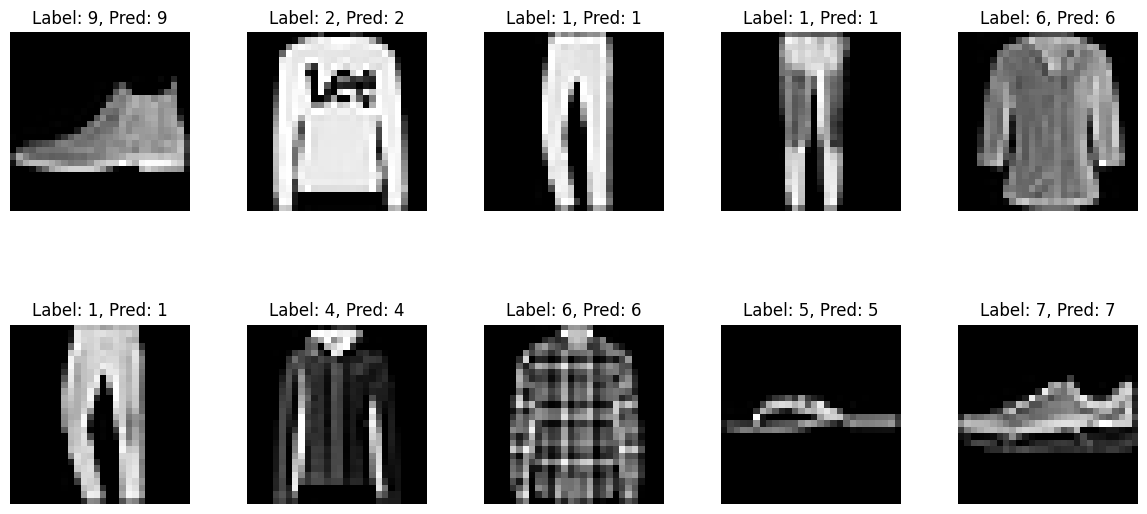

In [ ]:
# 20번
# 2행 5열로 test 데이터를 이미지로 출력합니다. # 10개의 이미지를 넣어서 테스트
# 학습된 모델이 분류기가 잘 작동하는지 label과 예측된 결과를 동시에 출력합니다.
# 3점

def plot_images_predictions(images, labels, predictions):
    images = images.cpu().numpy()
    labels = labels.cpu().numpy()
    predictions = predictions.cpu().numpy()

    fig, axs = plt.subplots(2, 5, figsize=(12, 6))
    fig.tight_layout()

    for i in range(2):
        for j in range(5):
            idx = i * 5 + j  # 이미지 인덱스 계산
            img = images[idx].squeeze()  # 이미지 텐서에서 차원 축소
            true_label = labels[idx]  # 정답 레이블
            pred_label = predictions[idx]  # 예측 레이블

            axs[i, j].imshow(img, cmap='gray')  # 이미지 출력
            axs[i, j].set_title(f"Label: {true_label}, Pred: {pred_label}")  # 제목 설정
            axs[i, j].axis('off')  # 축 제거

    plt.show()

# 테스트 데이터의 배치 가져오기
test_batch = next(iter(dataloaders['test']))

# 테스트 데이터의 이미지와 레이블 추출
test_images, test_labels = test_batch

# 모델의 예측 수행
model2.eval()
with torch.no_grad():
    test_predictions = model2(test_images.to(device))

# 예측 결과 시각화
plot_images_predictions(test_images, test_labels, test_predictions.argmax(dim=1))
